# Investigate ML Data Files (numpy) Normalized and non-Normalized

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import time as t
from time import perf_counter as cput

print("Awkward version: "+str(ak.__version__))
print("Uproot version: "+str(ur.__version__))
print("Numpy version: "+str(np.__version__))

Awkward version: 1.5.1
Uproot version: 4.1.8
Numpy version: 1.21.4


# STMC

## Un-normalized Data

In [5]:
stmc_prefix = '/fast_scratch_1/atlas/staged/'

In [6]:
Eta = np.load(stmc_prefix+'Eta_STMC_v2_400_train.npy', mmap_mode='r')
X = np.load(stmc_prefix+'X_STMC_v2_400_train.npy', mmap_mode='r')
Y = np.load(stmc_prefix+'Y_STMC_v2_400_train.npy', mmap_mode='r')

print(Eta.shape)
print(X.shape)
print(Y.shape)

(4106533,)
(4106533, 1495, 5)
(4106533,)


In [7]:
## Use rPerp as the zero mask
nz_mask = X[:,:,3] != 0
t_mask = X[:,:,4] == 1
nzc_mask = np.logical_and(nz_mask, np.invert(t_mask))
nzt_mask = np.logical_and(nz_mask, t_mask)
print(nzt_mask.shape)

(4106533, 1495)


### Event Eta

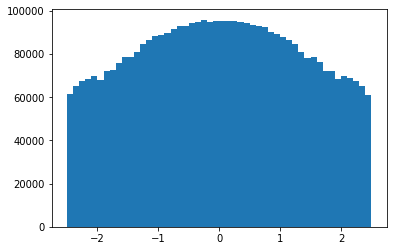

In [9]:
plt.hist(Eta, bins=50)
plt.show()

### Clusters

#### Cluster Cell Energy

In [10]:
emax = np.max(X[nzc_mask,0])
emin = np.min(X[nzc_mask,0])
print('Max cell energy: {}'.format(emax))
print('Min cell energy: {}'.format(emin))

Max cell energy: 1951.4298095703125
Min cell energy: 0.00500000175088644


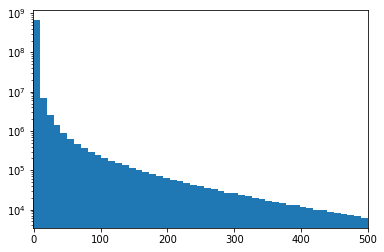

In [11]:
ebins = np.linspace(-1,500,50,endpoint=True)
plt.hist(X[nzc_mask,0], bins=ebins)
plt.xlim(ebins[0], ebins[-1])
plt.yscale('log')
plt.show()

#### Cluster Cell Eta

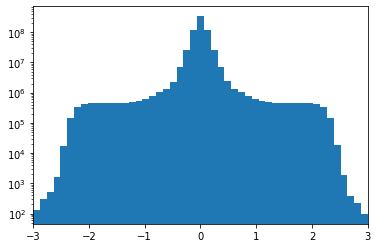

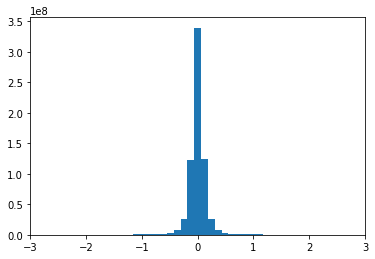

In [12]:
etabins = np.linspace(-3,3,50,endpoint=True)
plt.hist(X[nzc_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
plt.yscale('log')
plt.show()

plt.hist(X[nzc_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
plt.show()

#### Cluster Cell Phi

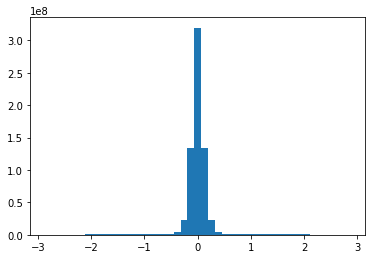

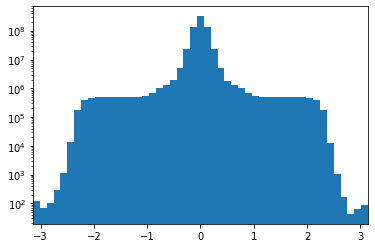

In [13]:
phibins = np.linspace(-np.pi,np.pi,50,endpoint=True)
plt.hist(X[nzc_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
plt.show()

phibins = np.linspace(-np.pi,np.pi,50,endpoint=True)
plt.hist(X[nzc_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
plt.yscale('log')
plt.show()

#### Cluster rPerp

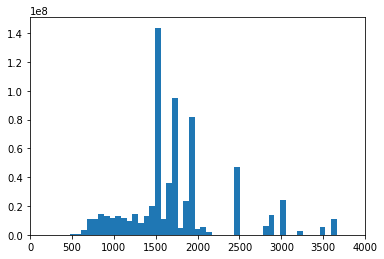

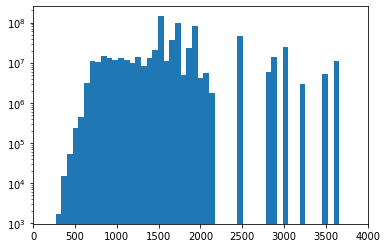

In [14]:
rperpbins = np.linspace(0,4000,60,endpoint=True)
plt.hist(X[nzc_mask,3], bins=rperpbins)
plt.xlim(rperpbins[0], rperpbins[-1])
plt.show()

rperpbins = np.linspace(0,4000,60,endpoint=True)
plt.hist(X[nzc_mask,3], bins=rperpbins)
plt.xlim(rperpbins[0], rperpbins[-1])
plt.yscale('log')
plt.show()

### Tracks

#### Track Projection Number

In [15]:
print(X.shape)
print(nzt_mask.shape)
ntrack = np.sum(X[:,:,4], axis=1)
print('Max number of tracks: {}'.format(np.max(ntrack)))
print(ntrack[:10])

(4106533, 1495, 5)
(4106533, 1495)
Max number of tracks: 9.0
[6. 6. 7. 7. 7. 6. 6. 7. 6. 7.]


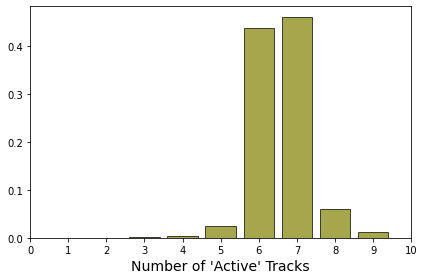

In [16]:
tbins = np.arange(-.5,10.5,1)
plt.hist(ntrack, bins=tbins, edgecolor='black', alpha=.7,
         density=True, rwidth=.8, color='olive')
plt.xlim(0,10)
plt.xticks(ticks=range(11), labels=\
          [str(i) for i in range(11)])
plt.xlabel('Number of \'Active\' Tracks', fontsize=14)
plt.tight_layout()
# plt.savefig('Plots/nTracks_Calo_2022-03-31.png', format='png')
plt.show()

In [17]:
event = 0
np.set_printoptions(suppress=True, precision=3)
for i in range(X.shape[1]):
    print(X[event,i,:])

[ 421.695   -0.004   -0.004 3020.       0.   ]
[   7.129   -0.004   -0.103 3020.       0.   ]
[   6.276   -0.004    0.094 3020.       0.   ]
[  13.233   -0.104   -0.004 3020.       0.   ]
[   3.034    0.096   -0.004 3020.       0.   ]
[   1.784   -0.104   -0.103 3020.       0.   ]
[   0.562    0.096   -0.103 3020.       0.   ]
[   2.427   -0.104    0.094 3020.       0.   ]
[   1.026    0.096    0.094 3020.       0.   ]
[   1.34    -0.004   -0.004 2450.       0.   ]
[   0.102   -0.104   -0.004 2450.       0.   ]
[  65.981    0.046   -0.004 3630.       0.   ]
[   2.044    0.046   -0.103 3630.       0.   ]
[   4.196    0.046    0.094 3630.       0.   ]
[   2.186   -0.154   -0.004 3630.       0.   ]
[   0.268    0.246   -0.004 3630.       0.   ]
[   0.224   -0.154   -0.103 3630.       0.   ]
[   0.044    0.246   -0.103 3630.       0.   ]
[   1.266   -0.154    0.094 3630.       0.   ]
[   0.115    0.196   -0.004 3020.       0.   ]
[   0.177   -0.204   -0.004 3020.       0.   ]
[   0.211   -

#### Track P

Maximum trackP: 15427740.0


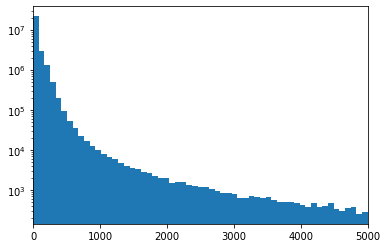

In [18]:
pbins = np.linspace(0,5000,60,endpoint=True)
print('Maximum trackP: {}'.format(np.max(X[nzt_mask,0])))
plt.hist(X[nzt_mask,0], bins=pbins)
plt.xlim(pbins[0], pbins[-1])
plt.yscale('log')
plt.show()

#### Track Eta

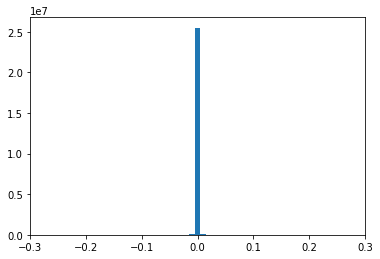

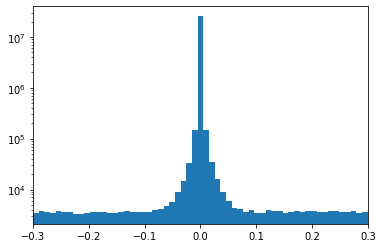

In [19]:
tebins = np.linspace(-.3,.3,60,endpoint=True)

plt.hist(X[nzt_mask,1], bins=tebins)
plt.xlim(tebins[0], tebins[-1])
# plt.yscale('log')
plt.show()

plt.hist(X[nzt_mask,1], bins=tebins)
plt.xlim(tebins[0], tebins[-1])
plt.yscale('log')
plt.show()

#### Track Phi

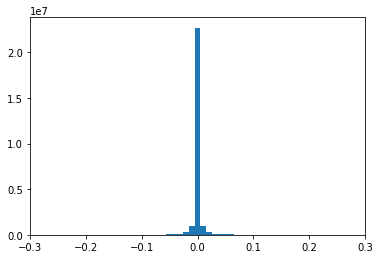

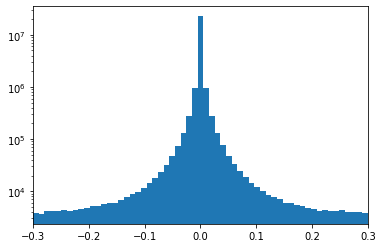

In [20]:
tphbins = np.linspace(-.3,.3,60,endpoint=True)

plt.hist(X[nzt_mask,2], bins=tphbins)
plt.xlim(tphbins[0], tphbins[-1])
# plt.yscale('log')
plt.show()

plt.hist(X[nzt_mask,2], bins=tphbins)
plt.xlim(tphbins[0], tphbins[-1])
plt.yscale('log')
plt.show()

#### Track rPerp

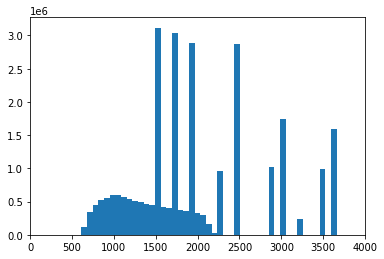

In [22]:
trbins = np.linspace(0,4000,60,endpoint=True)

plt.hist(X[nzt_mask,3], bins=trbins)
plt.xlim(trbins[0], trbins[-1])
# plt.yscale('log')
plt.show()

## Targets

In [23]:
None

## Normalized Data

In [24]:
stmc_norm = '/fast_scratch_1/atlas/normalized/'

In [25]:
Etan = np.load(stmc_norm+'Eta_STMC_v2_400_train_norm.npy')
Xn = np.load(stmc_norm+'X_STMC_v2_400_train_norm.npy', mmap_mode='r+')
Yn = np.load(stmc_norm+'Y_STMC_v2_400_train_norm.npy', mmap_mode='r+')

print(Etan.shape)
print(Xn.shape)
print(Yn.shape)

(4106533,)
(4106533, 1600, 5)
(4106533,)


In [26]:
nz_mask = Xn[:,:,3] != 0

### Energy

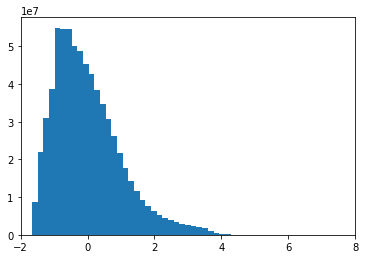

In [27]:
ebins = np.linspace(-2,8,60,endpoint=True)

plt.hist(Xn[nz_mask,0], bins=ebins)
plt.xlim(ebins[0], ebins[-1])
# plt.yscale('log')
plt.show()

### Eta

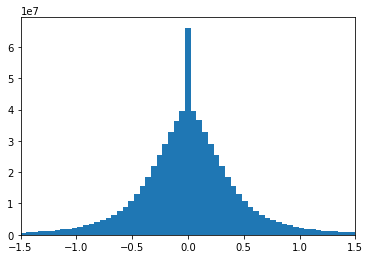

In [28]:
etabins = np.linspace(-1.5,1.5,60,endpoint=True)

plt.hist(Xn[nz_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
# plt.yscale('log')
plt.show()

### Phi

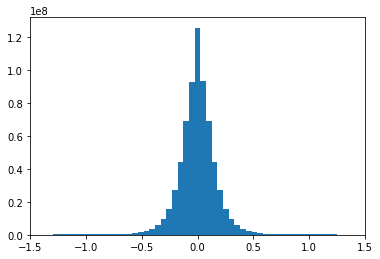

In [29]:
phibins = np.linspace(-1.5,1.5,60,endpoint=True)

plt.hist(Xn[nz_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
# plt.yscale('log')
plt.show()

### rPerp

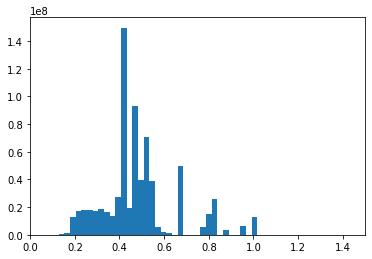

In [30]:
rpbins = np.linspace(0,1.5,60,endpoint=True)

plt.hist(Xn[nz_mask,3], bins=rpbins)
plt.xlim(rpbins[0], rpbins[-1])
# plt.yscale('log')
plt.show()

### Manually Investigate

In [31]:
event = 0
np.set_printoptions(suppress=True, precision=3)
for i in range(Xn.shape[1]):
    print(Xn[event,i,:])

[ 3.881 -0.015 -0.006  0.832  0.   ]
[ 1.946 -0.015 -0.139  0.832  0.   ]
[ 1.886 -0.015  0.128  0.832  0.   ]
[ 2.239 -0.425 -0.006  0.832  0.   ]
[ 1.541  0.396 -0.006  0.832  0.   ]
[ 1.289 -0.425 -0.139  0.832  0.   ]
[ 0.741  0.396 -0.139  0.832  0.   ]
[ 1.435 -0.425  0.128  0.832  0.   ]
[1.027 0.396 0.128 0.832 0.   ]
[ 1.153 -0.015 -0.006  0.675  0.   ]
[-0.068 -0.425 -0.006  0.675  0.   ]
[ 3.002  0.19  -0.006  1.     0.   ]
[ 1.353  0.19  -0.139  1.     0.   ]
[1.695 0.19  0.128 1.    0.   ]
[ 1.385 -0.63  -0.006  1.     0.   ]
[ 0.389  1.011 -0.006  1.     0.   ]
[ 0.306 -0.63  -0.139  1.     0.   ]
[-0.462  1.011 -0.139  1.     0.   ]
[ 1.126 -0.63   0.128  1.     0.   ]
[-0.01   0.806 -0.006  0.832  0.   ]
[ 0.194 -0.836 -0.006  0.832  0.   ]
[ 0.277 -0.836 -0.139  0.832  0.   ]
[-0.105 -0.836  0.128  0.832  0.   ]
[ 0.292 -0.836 -0.006  0.675  0.   ]
[-0.573 -0.015 -0.273  0.832  0.   ]
[ 1.07  -0.425 -0.273  0.832  0.   ]
[-0.891  0.396 -0.273  0.832  0.   ]
[-0.93  -0.

# Target

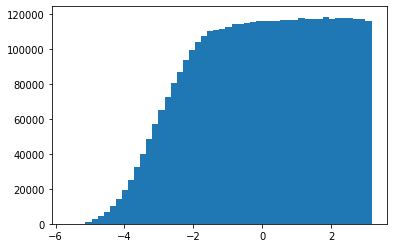

In [32]:
plt.hist(Yn, bins=50)
plt.show()

# Energy Cut of STMC v2 Data Studies

#### Load .npz Files

In [26]:
Energy_files = np.load('/data/atlas/rbate/STMC_v2_Energy_5_files.npz')
print(Energy_files['kwds'])

['STAC' 'STMC']


In [36]:
STAC_E = Energy_files['args'][0]
STMC_E = Energy_files['args'][1]
nSTAC = STAC_E.shape[0]
nSTMC = STMC_E.shape[0]
print('len STAC: {}'.format(nSTAC))
print('len STMC: {}'.format(nSTMC))

len STAC: 48473
len STMC: 48473


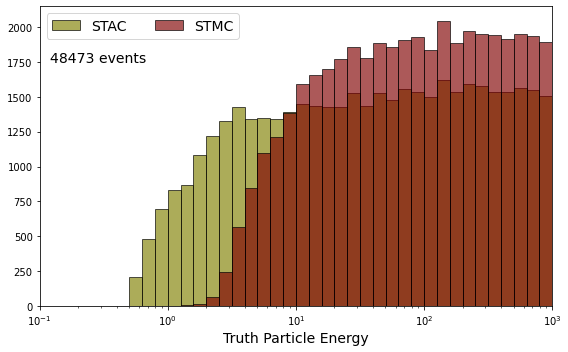

In [47]:
enbins=[10**exp for exp in np.arange(-1.0, 3.1, 0.1)]

fig = plt.figure(figsize=(8,5))
plt.hist(STAC_E, bins=enbins, color='olive', alpha=.65, density=False,
        edgecolor='black', rwidth=1.0, label='STAC')
plt.hist(STMC_E, bins=enbins, color='maroon', alpha=.65, density=False,
        edgecolor='black', rwidth=1.0, label='STMC')
plt.xscale('log')
plt.xlabel('Truth Particle Energy', fontsize=14)
plt.xlim(np.min(enbins), np.max(enbins))
plt.legend(ncol=2, prop={'size':14}, loc='upper left')
plt.text(x=.12, y=1750, s='{} events'.format(nSTAC), fontsize='14')
plt.tight_layout()
# plt.savefig('Plots/STMC_vs_STAC_2022-03-31.png',
            # format='png')
plt.show()

# Cluster Only

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import time as t
from time import perf_counter as cput

print("Awkward version: "+str(ak.__version__))
print("Uproot version: "+str(ur.__version__))
print("Numpy version: "+str(np.__version__))

datapath_prefix = '/data/atlas/rbate/'

Awkward version: 1.5.1
Uproot version: 4.1.8
Numpy version: 1.21.4


In [16]:
Xraw_CLO = np.load(datapath_prefix+'X_CLO_50_files.npy', mmap_mode='r')
Yraw_CLO = np.load(datapath_prefix+'Y_CLO_50_files.npy', mmap_mode='r')

In [17]:
print(Xraw_CLO.shape)

(229050, 945, 4)


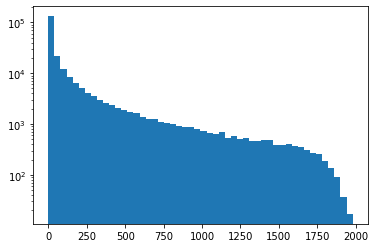

In [21]:
plt.hist(Yraw_CLO, bins=50)
plt.yscale('log')
plt.show()

In [19]:
z_targ_mask = Yraw_CLO == 0
print(np.any(z_targ_mask))

False
